# Comprehensive PyTorch CIFAR10 tutorial

This is an attempt on making the PyTorch CIFAR10 image recognition model tutorial more beginer friendly, for the original tutorial and more please refer to the original site in the following link:

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

Note: If you have corrections or better ways of explaining the code in this tutorial feel free to make changes

# 1. Loading a normalizing CIFAR10

In [1]:
import torch  # The ML library
import torchvision # The CV ML library
import torchvision.transforms as transforms # Utility to transform objects into tensors

In [2]:
transform = transforms.Compose(  # Creates a transform that applies two transforms
    [transforms.ToTensor(), # Transforms a PIL image or a Numpy array into a tensor
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]) #Normalizes the numpy tensor

In [3]:
trainset = torchvision.datasets.CIFAR10(  # Gets data from the CIFAR10 image library
    root='./data',  # The directory where the data will be downloaded
    train=True, # The data will be training data
    transform=transform,  # We will use the transform defined erlier
    download=True)  # We will download the data

trainloader = torch.utils.data.DataLoader(  #Creater an iterable for the dataset
    trainset, # We specify were the data was loaded
    batch_size=4, # How many images per batch
    shuffle=True, # Reshuffles the data after every loss computation
    num_workers=2)  # How many subprocesses will be used for data loading

'''We proceed to create the set for testing and it's loader in the same fashion'''

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:
import matplotlib.pyplot as plt # For plotting the images
import numpy as np  # For manipulating matrices

In [6]:
def imshow(img): # A function for a human-friendly image visualization
  img = (img / 2) +0.5 #removes normalization
  npimg = img.numpy()
  plt.imshow( # Displays matrix as image, in memory, not in screen
      np.transpose( # Makes the columns of a matrix into rows and viceversa
          npimg,(1,2,0)))
  plt.show()  #Displays the image in screen


In [7]:
dataiter = iter(trainloader) # Creater an iterator with the data on trainloader
images, labels = dataiter.next()  # returns the next item in the iterator and passes it's two entries to the two variables


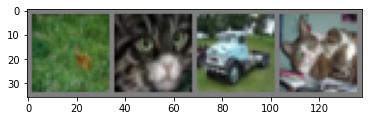

 deer   cat truck   cat


In [8]:
imshow(torchvision.utils.make_grid(images)) # We used the new function
print(' '.join('%5s' % classes[labels[j]] for j in range(4))) # We print the labels

# 2. Define a Convolutional Neural Network

In [9]:
import torch.nn as nn # The neural network sub library
import torch.nn.functional as F  # A second level sublibrary with convolution functions

In [10]:
class Net(nn.Module): # Creates a neural network called Net usinf nn.Module as a base class
    def __init__(self): # A method to initialize the neural network object and it's subsequent methods
      super(Net, self).__init__()
      self.conv1 = nn.Conv2d( # A 2D convolution from 3 inputs to 6 outputs
          in_channels=3,  # How many entries will this layer get
          out_channels=6, # How many channels this layer will output
          kernel_size=5)  # The size of the square matrix
      self.pool = nn.MaxPool2d( # Reduces the dimensions of the last matrix using a 2x2 kernel with
          kernel_size = 2,  # The size of the square matrix the pooling will use
          stride = 2) # How many cells the kernel will move in each iteration of the pooling
      self.conv2 = nn.Conv2d(6, 16, 5)  # Another comvolution layer with diferent parameters
      
      self.fc1 = nn.Linear( # Creates a layer of neurons to make a linear transformation
          in_features = 16 * 5 * 5, # Gets 400 input features
          out_features = 120) # Returns 120 output features
      self.fc2 = nn.Linear(120, 84) # Another layer
      self.fc3 = nn.Linear(84, 10)  # Another layer

    def forward(self, x): # A method to make a prediction
      x = self.pool(  # Reduces the dimension of it's argument matrix
          F.relu( # An activation function that makes all negative values zero, leaving positive values alone
              self.conv1(x))) # Uses the conv1 method of self to convolute x
      x = self.pool(F.relu(self.conv2(x))) # Uses conv2 method to convolute into next layer, then uses activation function and reduces dimensions
      x = x.view(-1, 16 * 5 * 5)  # reshapes x
      x = F.relu(self.fc1(x)) # Uses the fc1 method to use the first neuron layer, then it uses the activation function
      x = F.relu(self.fc2(x))
      x = self.fc3(x)
      return x # Returns the data for the prediction

In [11]:
net = Net() # We create an object net based on the class Net()

# 3. Define a Loss function and optimizer

In [12]:
import torch.optim as optim # To optimize parameters based on the gradients

criterion = nn.CrossEntropyLoss() # A criterion that uses LogSoftmax and NLLoss, the first decides the output of a neuron, the second the loss on a prediction
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # Standard Gradient descent function for finding the minimum error

# 4. Train the network

In [13]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0  # A variable to store the loss
    for i, data in enumerate(trainloader, 0): # Iterates over the indexes and tensors on the data stored in trainloader
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data # Gets saves the tensors in the input variable and the labels in the second one

        # zero the parameter gradients
        optimizer.zero_grad() # We set gradients to zero to avoid the gradients of the previes epoch afecting the current ones

        # forward + backward + optimize
        outputs = net(inputs) # Computes the predictions
        loss = criterion(outputs, labels) # calculates the loss using the predictions and their labels
        loss.backward() # COmputes the gradients for for the current tensor
        optimizer.step()  #Moves the parameters into the direction given by the gradients

        # print statistics
        running_loss += loss.item() # Adds the current loss to the total loss
        if i % 2000 == 1999:    # prints the following information every 2000 tensors
            print('[%d, %5d] loss: %.3f' %  # Prints the epoch, the index and the running loss as int, int and float
                  (epoch + 1, i + 1, running_loss / 2000))  # The running_loss is divided by 2000 to get the average loss
            running_loss = 0.0  # Resets the total loss for the next mini-batch

print('Finished Training')

[1,  2000] loss: 2.275
[1,  4000] loss: 1.921
[1,  6000] loss: 1.697
[1,  8000] loss: 1.584
[1, 10000] loss: 1.528
[1, 12000] loss: 1.463
[2,  2000] loss: 1.383
[2,  4000] loss: 1.351
[2,  6000] loss: 1.313
[2,  8000] loss: 1.270
[2, 10000] loss: 1.267
[2, 12000] loss: 1.244
Finished Training


In [14]:
PATH = './cifar_net.pth' # The path where the model will be saved
torch.save(net.state_dict(), PATH) # A mathod to save the model

# 5. Test the network on the test data

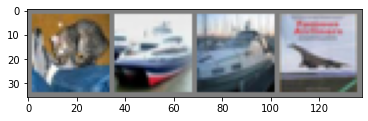

GroundTruth:    cat  ship  ship plane


In [15]:
dataiter = iter(testloader) # Generates an iterator for the test images
images, labels = dataiter.next() # Gets the next batch of image / label pairs

# print images
imshow( #Uses the function we defined earlier to show the images
    torchvision.utils.make_grid(images)) # Makes a grid for the images
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))  # Prints the original labels

In [16]:
net = Net() # We overwrite the model we had before to demonstrate how to load it
net.load_state_dict(torch.load(PATH)) # Here we load the model previously saved

<All keys matched successfully>

In [17]:
outputs = net(images) # We store the labels predicted by the model

In [18]:
_, predicted = torch.max(outputs, dim = 1) # Returns the tensor and it's prediction

# Now we print the prediction
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane
